In [67]:
pip install py-AutoClean


In [68]:
import pandas as pd
from AutoClean import AutoClean
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [70]:
cleaned_data = AutoClean(
    data,
    mode='manual',               # You can change to 'auto' for automatic processing
    missing_num='auto',          # Handle missing numeric values
    missing_categ='auto',        # Handle missing categorical values
    outliers='auto',             # Detect and handle outliers
    duplicates='auto',           # Remove duplicates
    extract_datetime='s'         # Extract date components if any datetime present
)

AutoClean process completed in 0.942528 seconds
Logfile saved to: /content/autoclean.log


In [71]:
df_cleaned = cleaned_data.output

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from AutoClean import AutoClean

# **discriptive data analysis**

# **Categorical graphs**

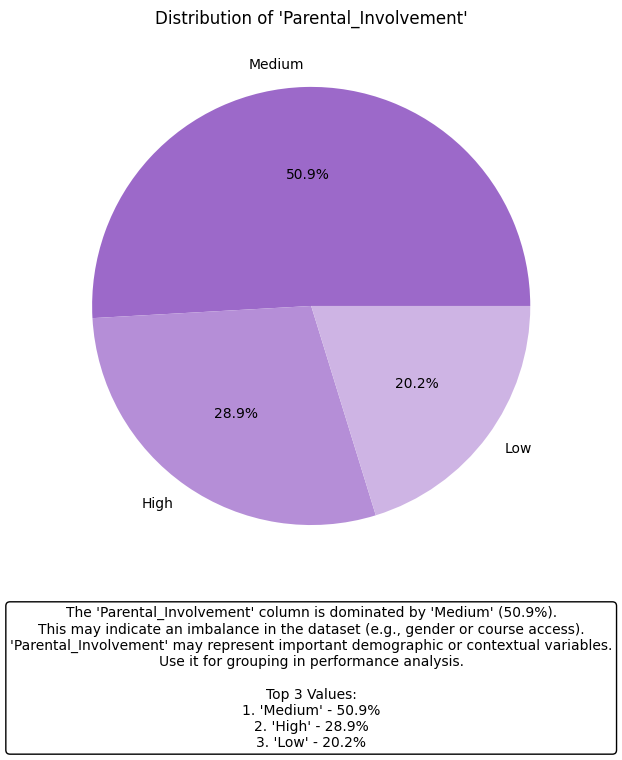

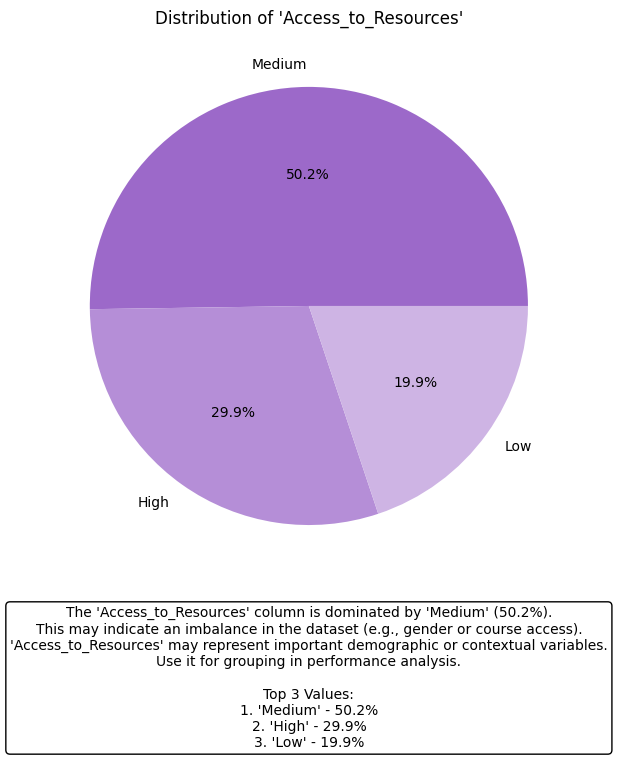

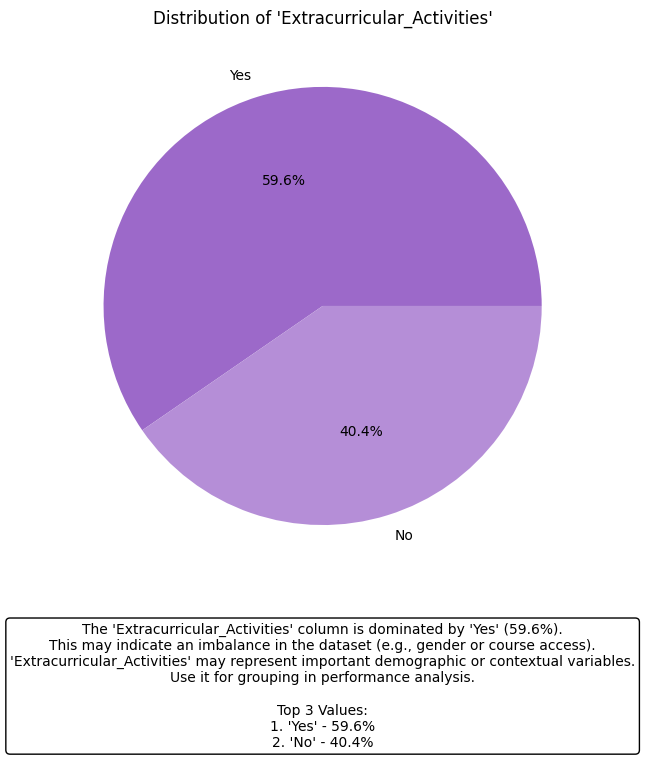

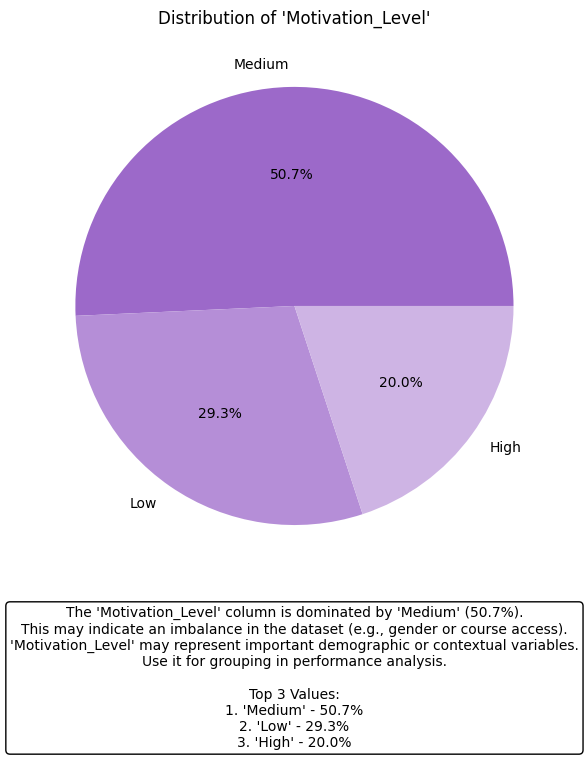

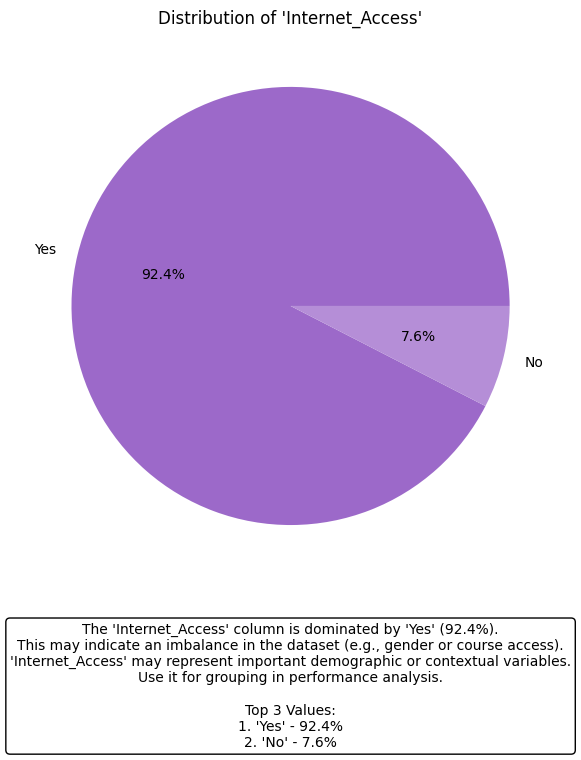

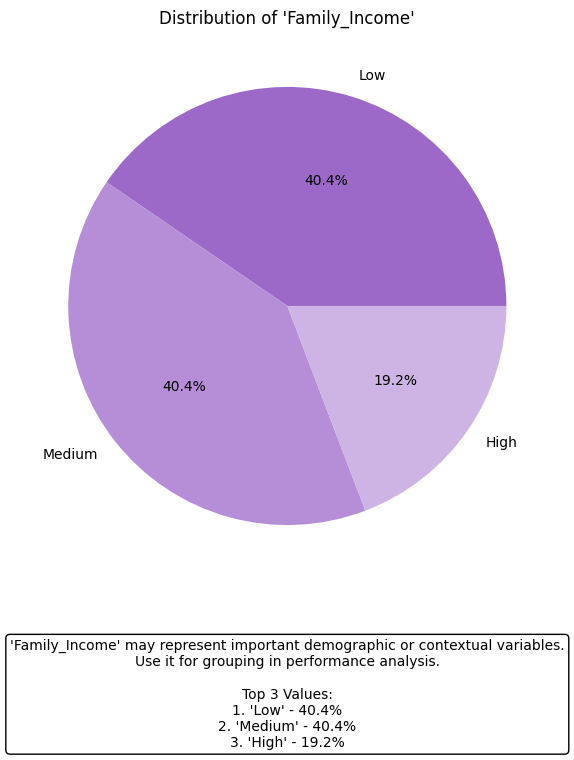

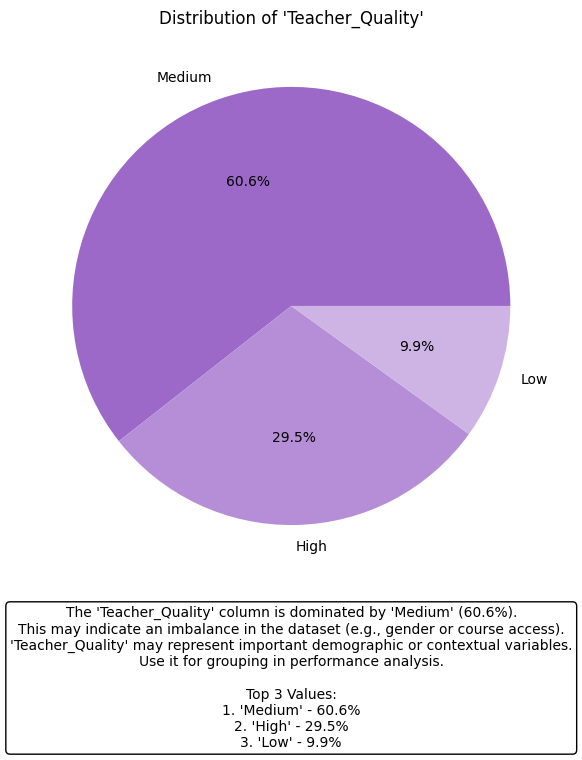

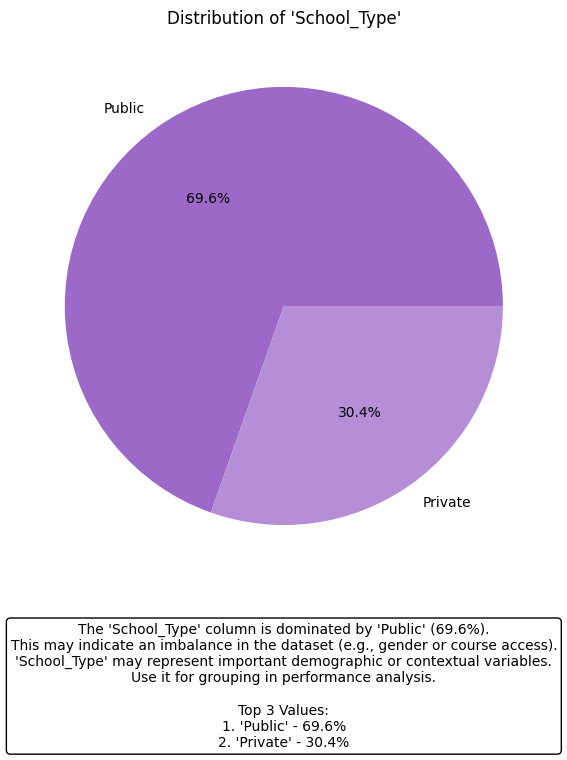

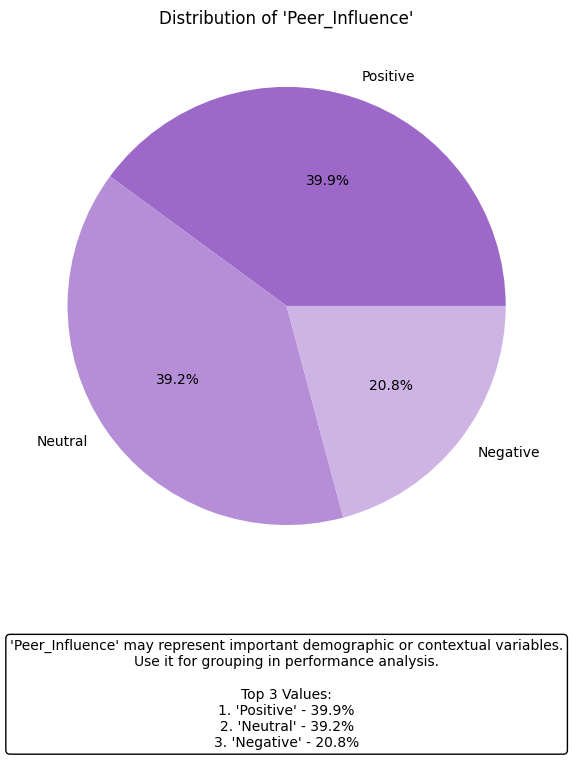

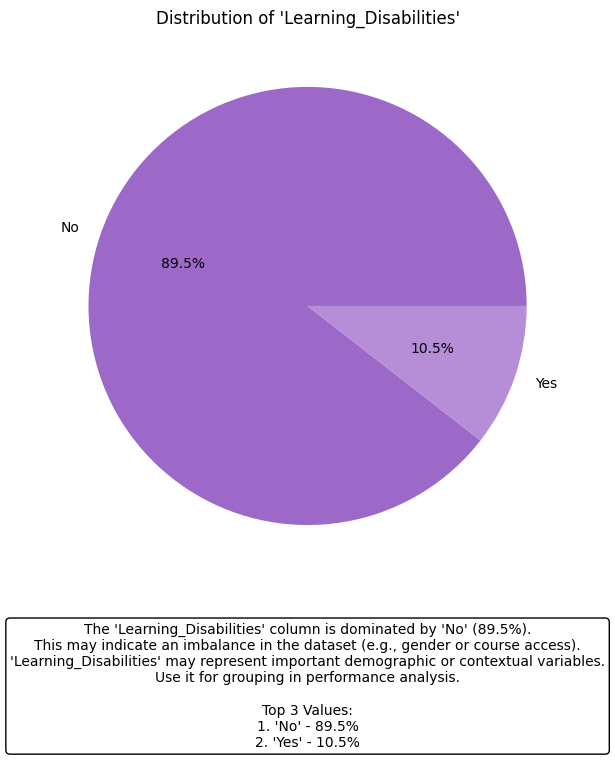

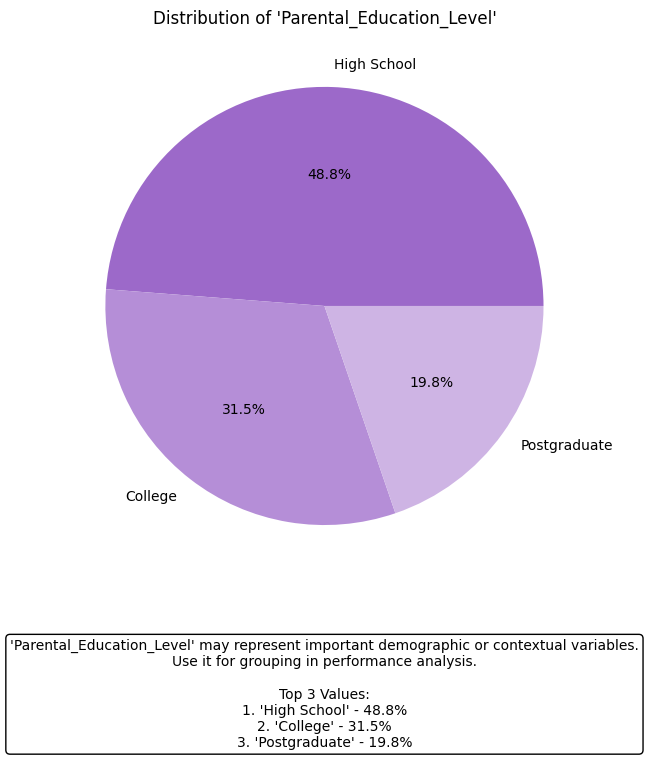

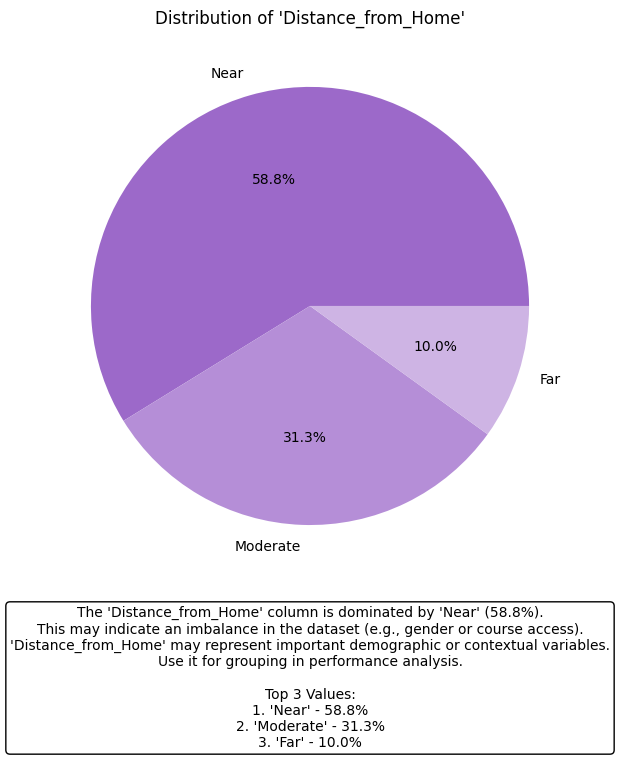

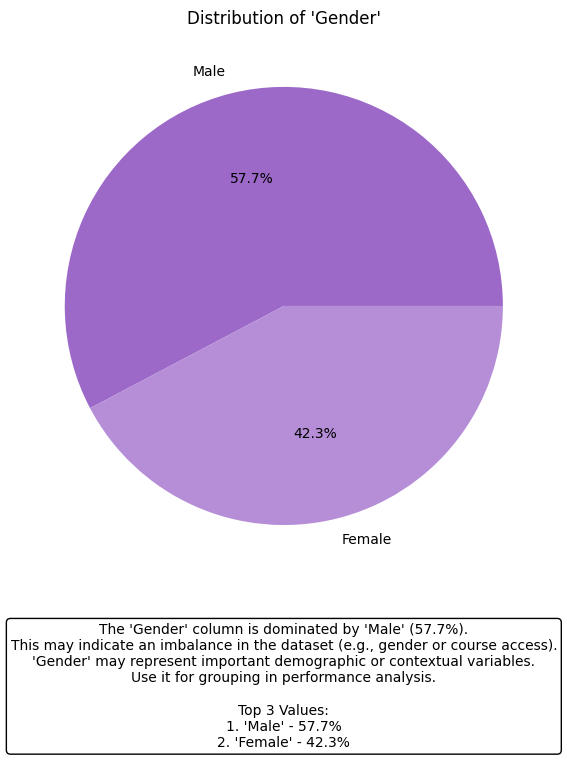

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def is_likely_id_column(df, column):
    """Identifies if a column is likely an ID based on unique values ratio."""
    unique_ratio = df[column].nunique() / len(df)
    return unique_ratio > 0.5

def generate_dynamic_categorical_insights(df, column):
    """Generates student performance-related insights from categorical data."""
    category_counts = df[column].value_counts(normalize=True)
    total_values = len(df)
    unique_values = df[column].nunique()

    top_category = category_counts.idxmax()
    top_category_percentage = category_counts.max()

    insights = []

    if top_category_percentage > 0.5:
        insights.append(f"The '{column}' column is dominated by '{top_category}' ({top_category_percentage:.1%}).\n"
                        f"This may indicate an imbalance in the dataset (e.g., gender or course access).")

    if unique_values > 50 and top_category_percentage < 0.05:
        insights.append(f"'{column}' has {unique_values} unique values with no dominant group.\n"
                        f"Consider grouping categories or using clustering to identify patterns in performance.")

    if unique_values > 5 and top_category_percentage < 0.3:
        insights.append(f"'{column}' is well distributed with {unique_values} categories.\n"
                        f"Explore relationships between this and student scores for deeper insights.")

    if (category_counts < 0.01).sum() > unique_values * 0.5:
        insights.append(f"Many values in '{column}' occur rarely.\n"
                        f"Check if they represent edge cases, special programs, or data inconsistencies.")

    if unique_values < total_values * 0.05:
        insights.append(f"'{column}' may represent important demographic or contextual variables.\n"
                        f"Use it for grouping in performance analysis.")

    # Top 3 values summary
    top_3_values = category_counts.head(3)
    top_3_text = "\n".join([f"{i+1}. '{val}' - {perc:.1%}" for i, (val, perc) in enumerate(top_3_values.items())])

    return "\n".join(insights) + "\n\nTop 3 Values:\n" + top_3_text if insights else f"'{column}' contains meaningful insights.\n\nTop 3 Values:\n{top_3_text}"

def plot_top_categorical_counts(df):
    """Plots top categorical variables from a student dataset with performance insights."""
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if not is_likely_id_column(df, col)]

    for column in categorical_columns:
        category_counts = df[column].value_counts().nlargest(10)
        unique_values = df[column].nunique()

        plt.figure(figsize=(10, 6))

        if unique_values <= 3:  # Use pie chart for ≤3 unique values
            plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=LIGHT_COLORS)
            plt.title(f"Distribution of '{column}'")
        else:  # Use bar chart for more categories
            sns.barplot(y=category_counts.index, x=category_counts.values, palette=DARK_COLORS + LIGHT_COLORS)
            plt.xlabel("Count")
            plt.ylabel(column)
            plt.title(f"Top 10 '{column}' Categories")

        insight_text = generate_dynamic_categorical_insights(df, column)
        plt.figtext(0.5, -0.25, insight_text, wrap=True, horizontalalignment='center', fontsize=10,
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.tight_layout()
        plt.show()

# Example call
# Replace 'df_cleaned' with your actual DataFrame
plot_top_categorical_counts(df_cleaned)


# **Numerical graphs**

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]

def plot_score_distributions(df):
    """Plots distribution of numerical student scores with statistical notes in the legend."""
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for idx, column in enumerate(numerical_cols):
        data = df[column].dropna()
        mean_val = data.mean()
        median_val = data.median()
        std_dev = data.std()
        variance = data.var()
        skewness = data.skew()

        # Determine distribution type based on skewness
        if abs(skewness) < 0.5:
            dist_type = "Approximately Normal"
        elif skewness > 0.5:
            dist_type = "Right Skewed"
        else:
            dist_type = "Left Skewed"

        # Create legend text
        legend_text = (
            f"Mean: {mean_val:.2f}\n"
            f"Median: {median_val:.2f}\n"
            f"Std Dev: {std_dev:.2f}\n"
            f"Variance: {variance:.2f}\n"
            f"Skewness: {skewness:.2f} ({dist_type})"
        )

        # Plot
        plt.figure(figsize=(10, 5))
        sns.histplot(data, kde=True, bins=30, color=DARK_COLORS[idx % len(DARK_COLORS)])
        plt.title(f"Distribution of {column}", fontsize=14)
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.legend([legend_text], loc='best', frameon=True, edgecolor='black', fontsize=9)
        plt.tight_layout()
        plt.show()


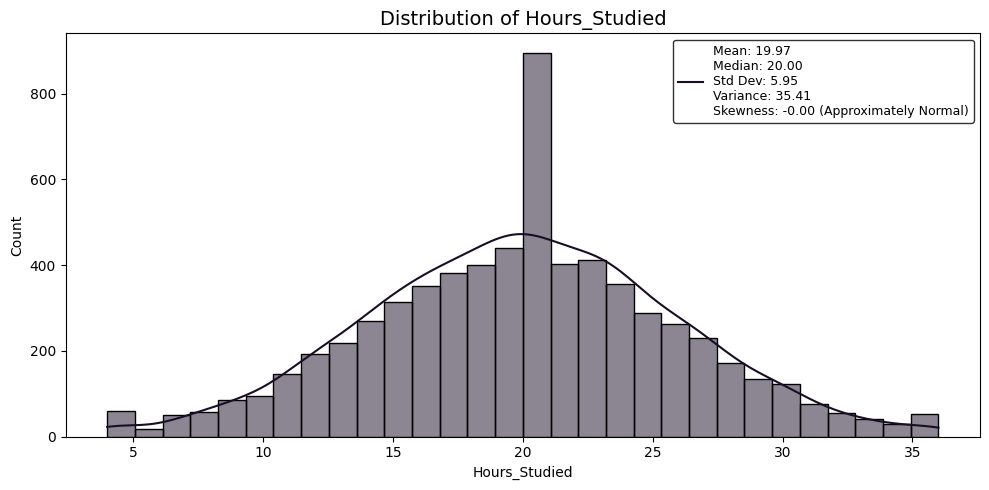

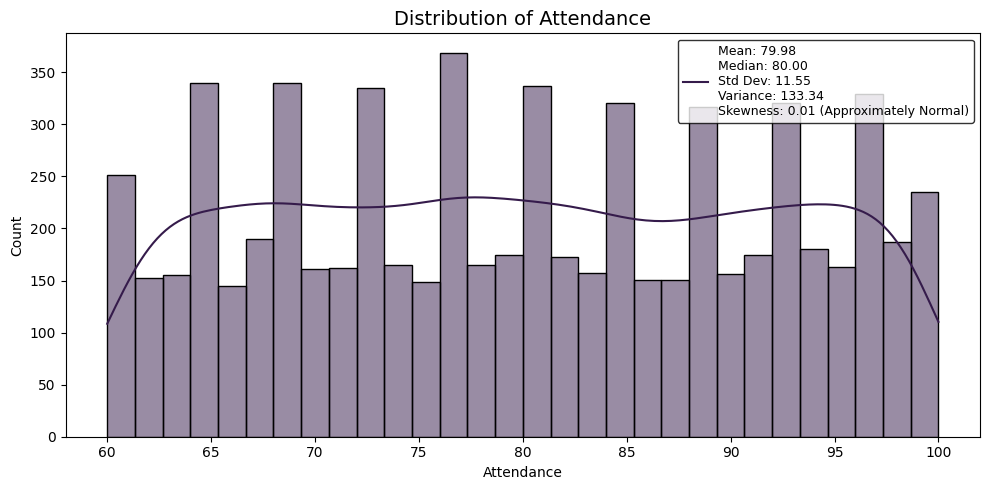

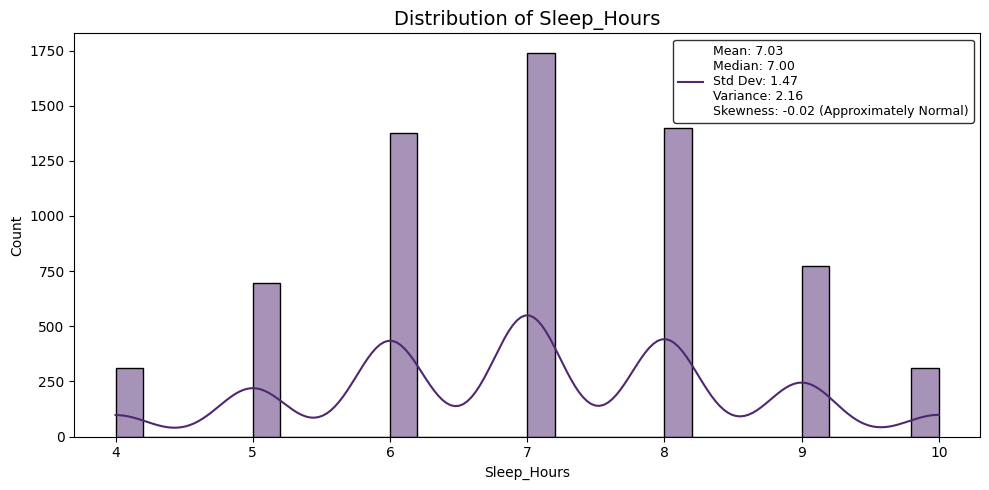

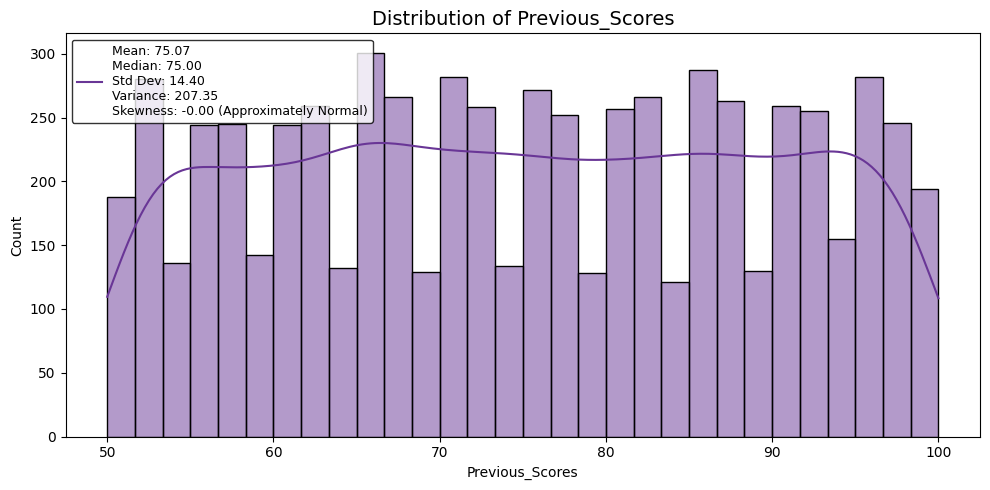

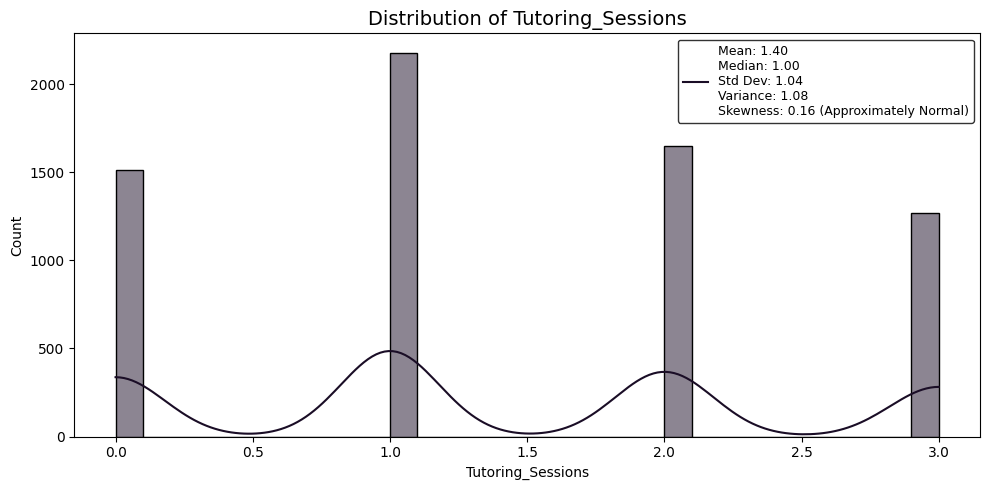

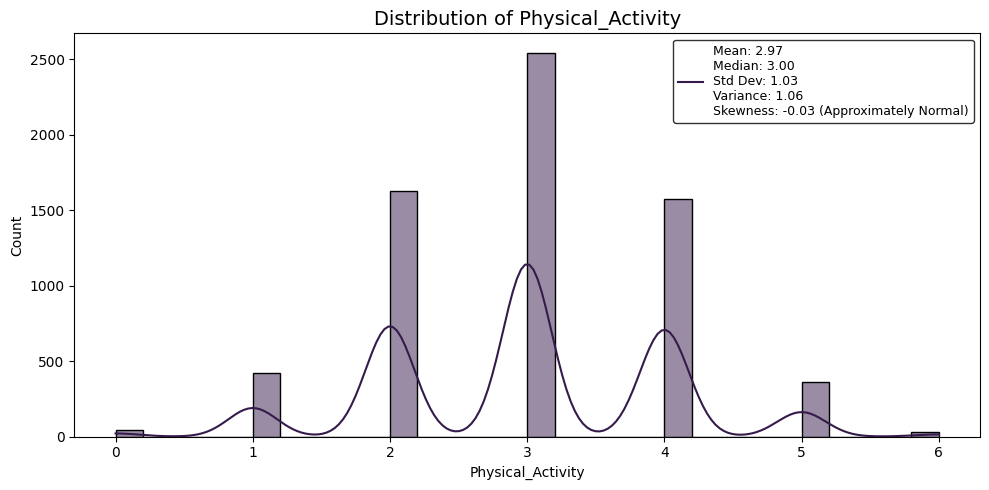

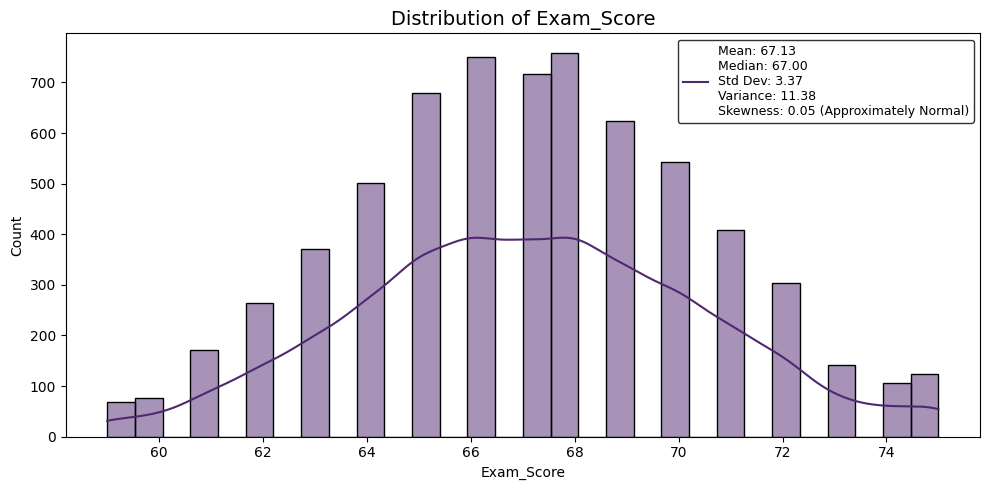

In [75]:
plot_score_distributions(df_cleaned)


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
OUTLIER_COLOR = "#FF5733"

def plot_score_distributions(df):
    """Plots distribution of student scores with stats, outliers, and embedded recommendations."""
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for idx, column in enumerate(numerical_cols):
        data = df[column].dropna()

        # Core stats
        mean_val = data.mean()
        median_val = data.median()
        std_dev = data.std()
        variance = data.var()
        skewness = data.skew()

        # Distribution type
        if abs(skewness) < 0.5:
            dist_type = "Approximately Normal"
        elif skewness > 0.5:
            dist_type = "Right Skewed"
        else:
            dist_type = "Left Skewed"

        # Outlier detection (IQR)
        q1, q3 = data.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        # Stats legend text
        legend_text = (
            f"Mean: {mean_val:.2f}\n"
            f"Median: {median_val:.2f}\n"
            f"Std Dev: {std_dev:.2f}\n"
            f"Variance: {variance:.2f}\n"
            f"Skewness: {skewness:.2f} ({dist_type})\n"
            f"Outliers: {len(outliers)}"
        )

        # Recommendation box text
        recommendations = []
        if variance > 100:
            recommendations.append("- High variance detected.")
        if abs(skewness) > 1:
            recommendations.append("- Highly skewed distribution. Consider normalization.")
        elif abs(skewness) > 0.5:
            recommendations.append("- Moderate skew. Watch for model bias.")
        else:
            recommendations.append("- Distribution is nearly normal.")
        if not outliers.empty:
            recommendations.append(f"- {len(outliers)} outliers found. Consider review/cleaning.")
        else:
            recommendations.append("- No significant outliers.")

        recommendation_text = "\n".join(recommendations)

        # Plot
        plt.figure(figsize=(10, 6))
        sns.histplot(data, kde=True, bins=30, color=DARK_COLORS[idx % len(DARK_COLORS)], label=None)
        if not outliers.empty:
            sns.rugplot(outliers, height=0.1, color=OUTLIER_COLOR, label="Outliers")

        plt.title(f"Distribution of {column}", fontsize=14)
        plt.xlabel(column)
        plt.ylabel("Count")

        # Stats legend
        plt.legend([legend_text], loc='upper right', fontsize=9, frameon=True, edgecolor='black')

        # Add recommendation box below plot
        plt.text(
            0.5, -0.35, recommendation_text,
            ha='center', va='top', transform=plt.gca().transAxes,
            fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="#F2F2F2", edgecolor="#999")
        )

        plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at bottom for text
        plt.show()


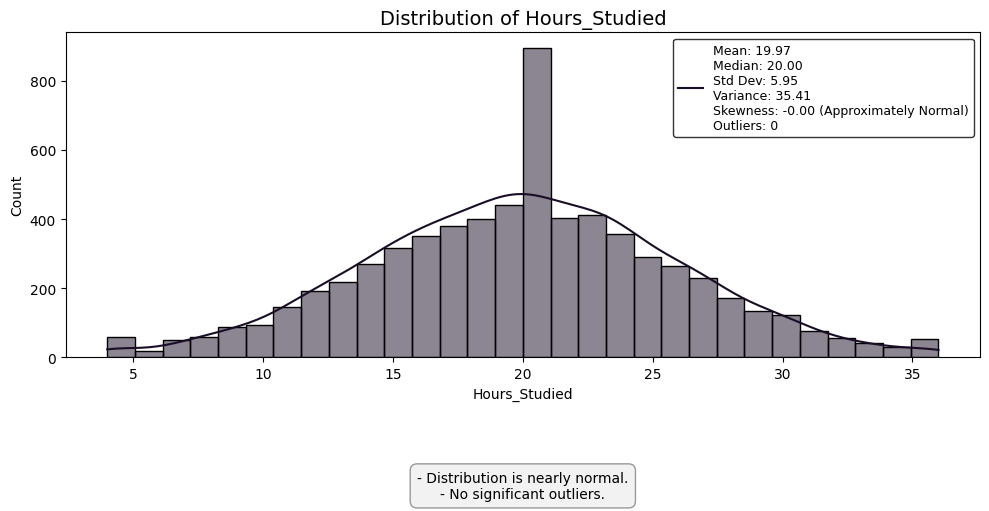

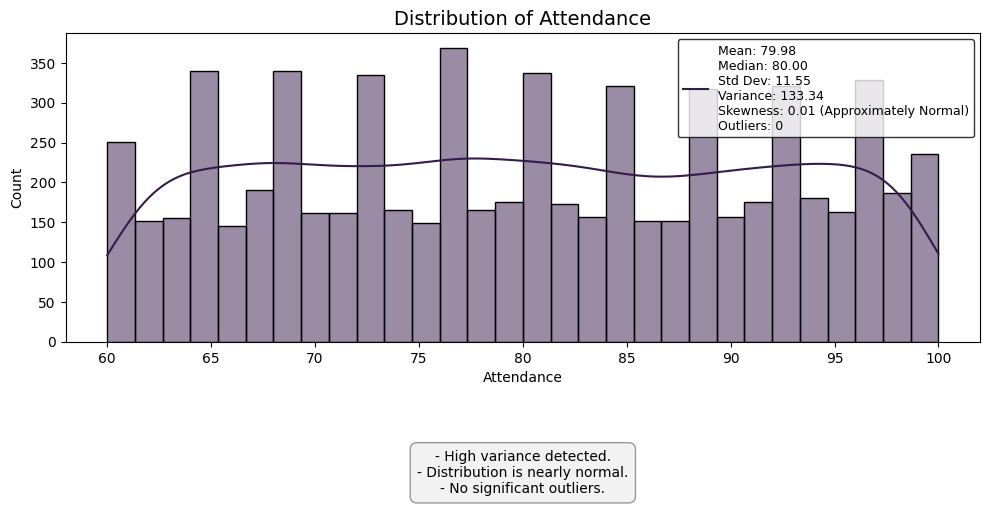

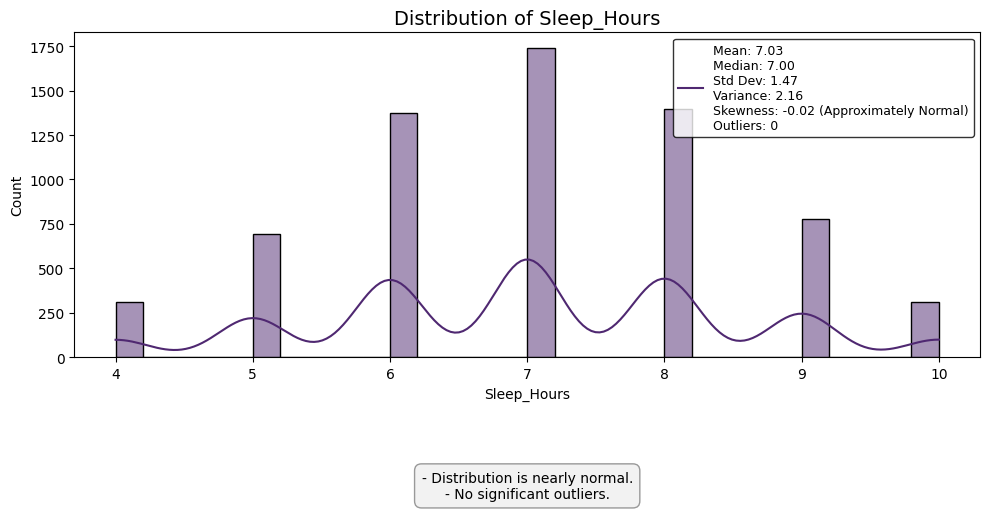

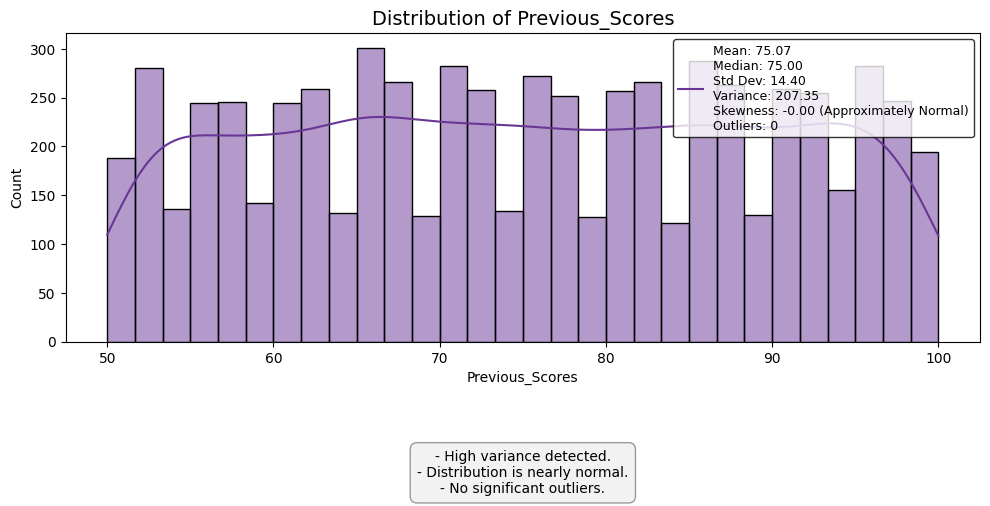

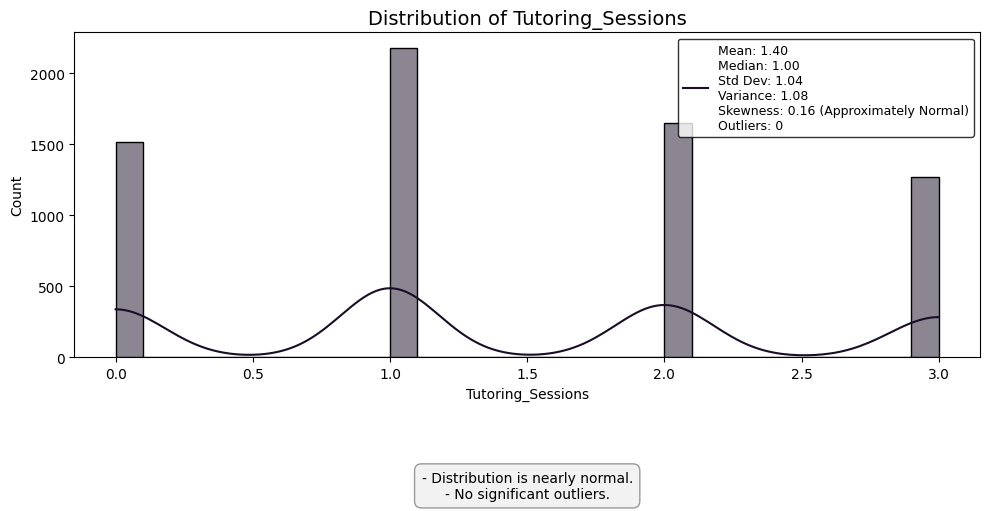

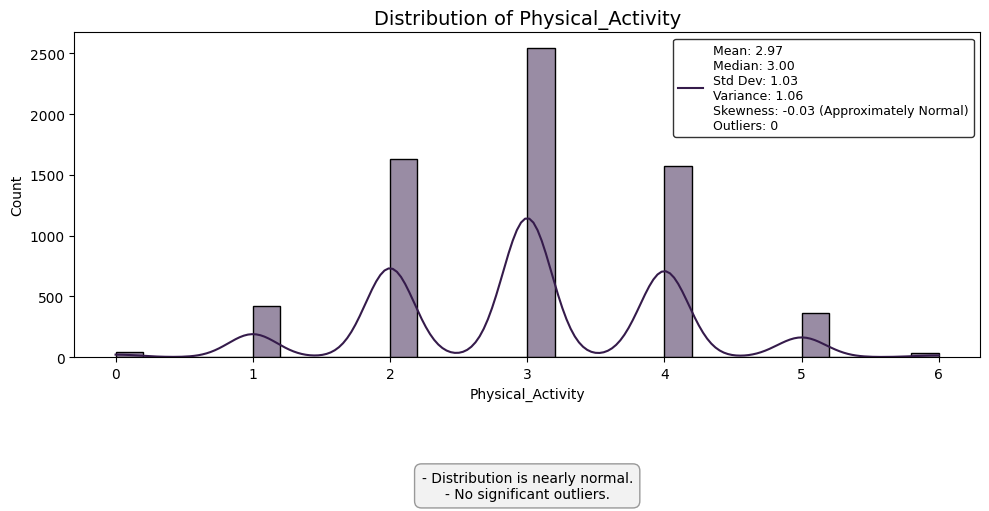

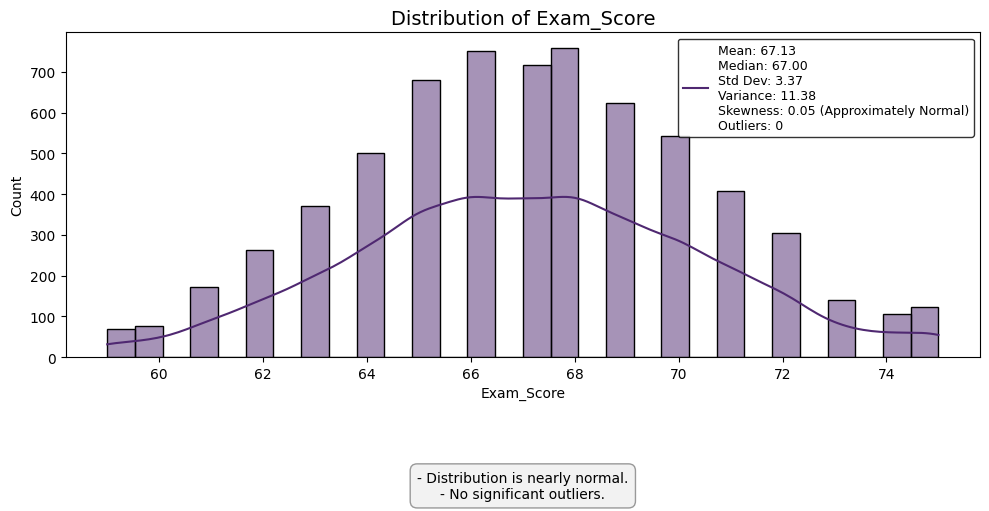

In [77]:
plot_score_distributions(df_cleaned)

# **Exploratory Data analysis**

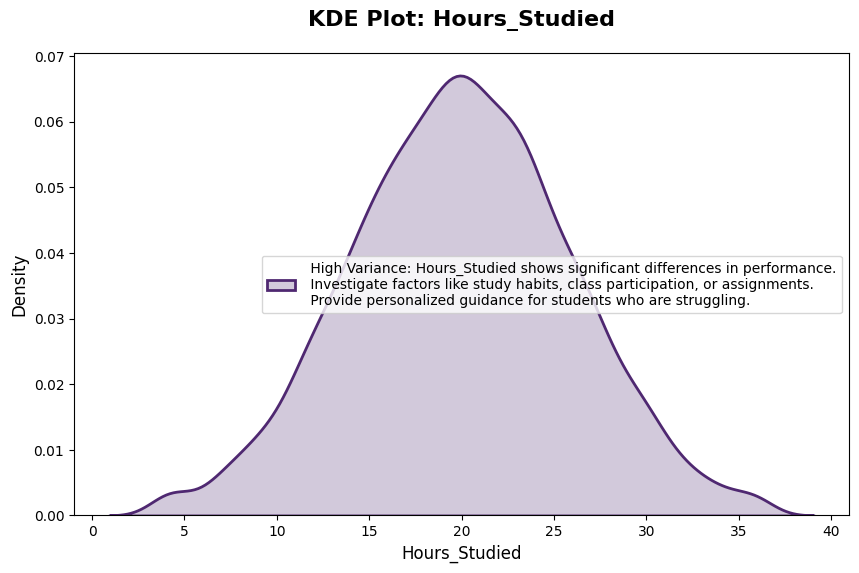

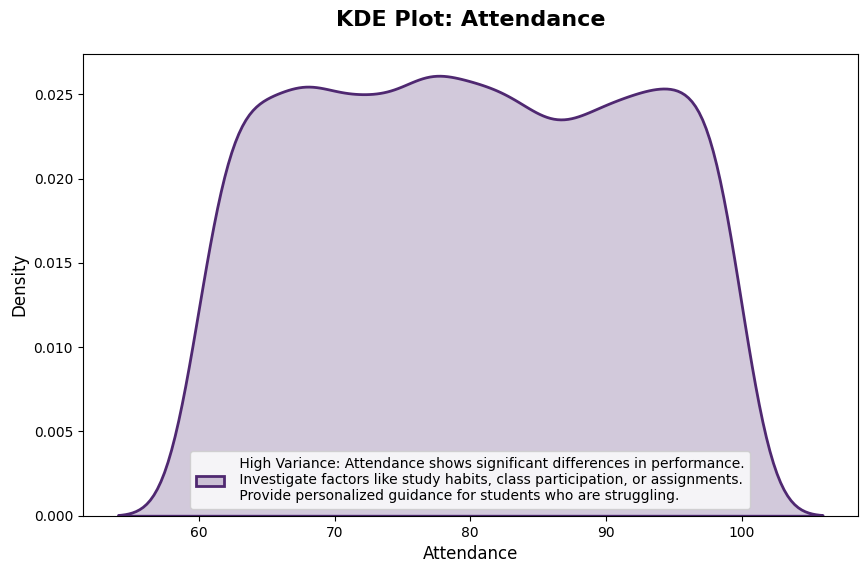

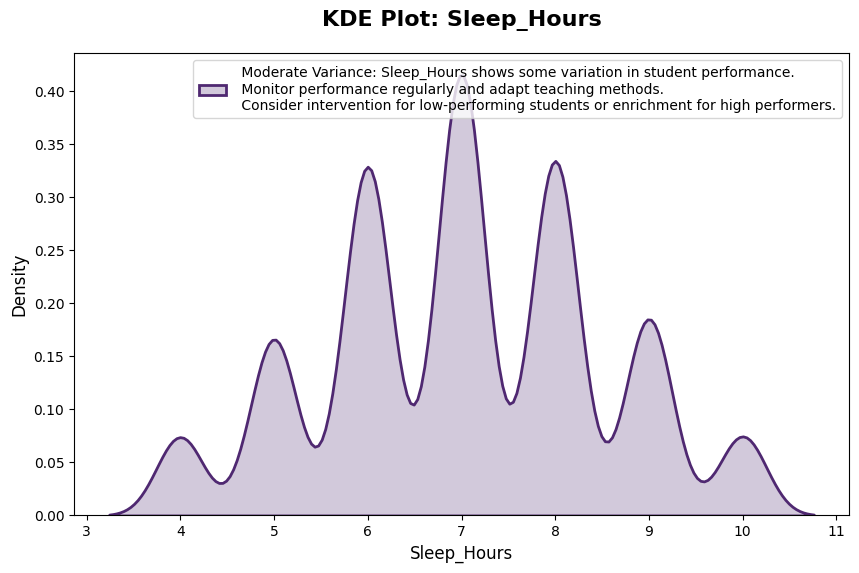

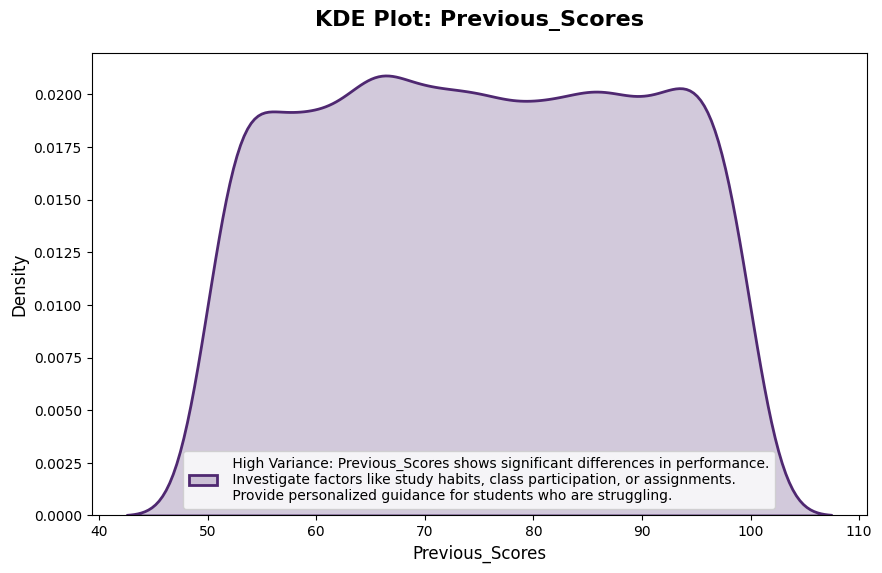

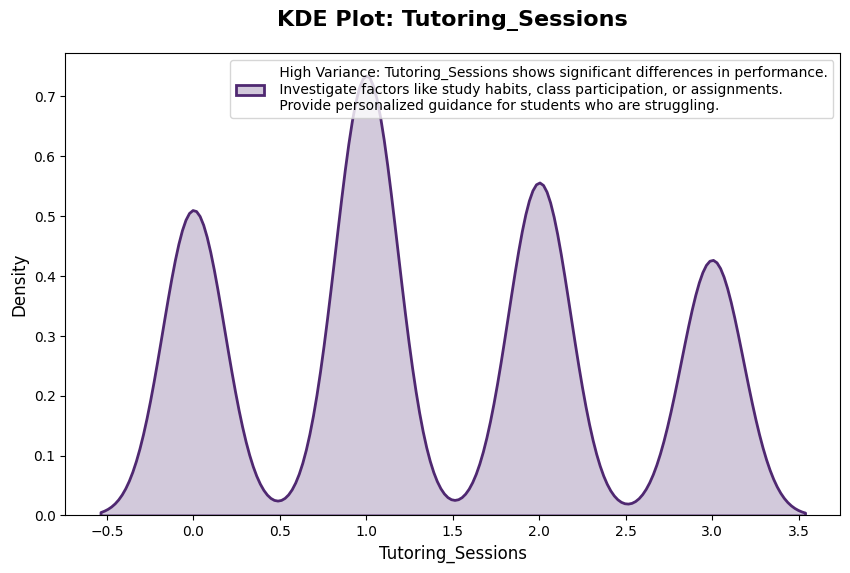

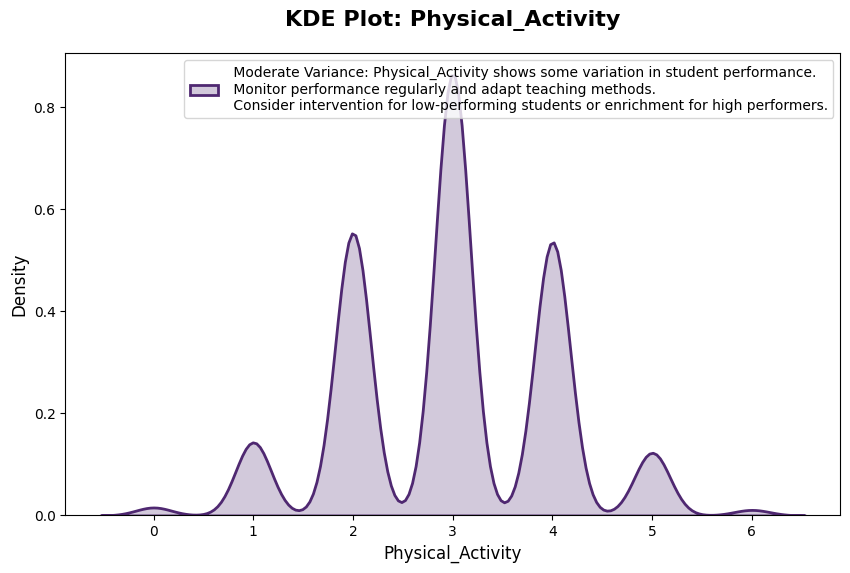

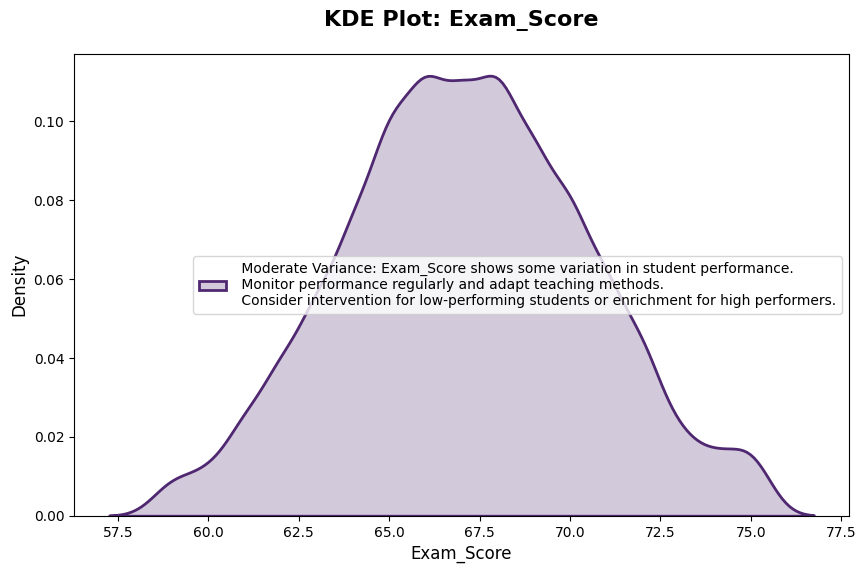

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define color themes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def is_id_column(df, col_name):
    """
    Detects ID-like columns dynamically based on uniqueness.
    If more than 50% of values are unique, the column is likely an identifier.
    """
    return df[col_name].nunique() > (0.5 * len(df))

def plot_kde_with_insights(df):
    """
    Generates Kernel Density Estimation (KDE) plots for numerical columns related to student performance,
    filters out ID-like columns, analyzes variance, and annotates insights using a legend.
    """
    # Define columns related to student performance (e.g., scores, grades, study hours)
    numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns if not is_id_column(df, col)]

    if not numerical_cols:
        print("No suitable numerical columns found for KDE plotting.")
        return

    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[col], shade=True, color=DARK_COLORS[2], linewidth=2, label=f"Distribution of {col}")

        # Calculate variance and standard deviation
        variance = np.var(df[col])
        std_dev = np.std(df[col])

        # Define variance categories dynamically based on column mean
        mean_value = df[col].mean()
        low_threshold = mean_value * 0.05
        high_threshold = mean_value * 0.5

        # Interpret variance levels
        if variance > high_threshold:
            insight = f"High Variance: {col} shows significant differences in performance."
            recommendation = f"Investigate factors like study habits, class participation, or assignments."
            action = f"Provide personalized guidance for students who are struggling."
        elif variance < low_threshold:
            insight = f"Low Variance: {col} shows stable performance across students."
            recommendation = f"Ensure consistent assessment methods."
            action = f"Look into whether the assessments are appropriately challenging."
        else:
            insight = f"Moderate Variance: {col} shows some variation in student performance."
            recommendation = f"Monitor performance regularly and adapt teaching methods."
            action = f"Consider intervention for low-performing students or enrichment for high performers."

        # Plot formatting
        plt.title(f"KDE Plot: {col}", fontsize=16, fontweight='bold', pad=20)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Density", fontsize=12)

        # Add insights as a legend instead of overlapping text
        plt.legend([f" {insight}\n {recommendation}\n {action}"], loc="best", fontsize=10, frameon=True)

        plt.show()

plot_kde_with_insights(df_cleaned)


# **Report**

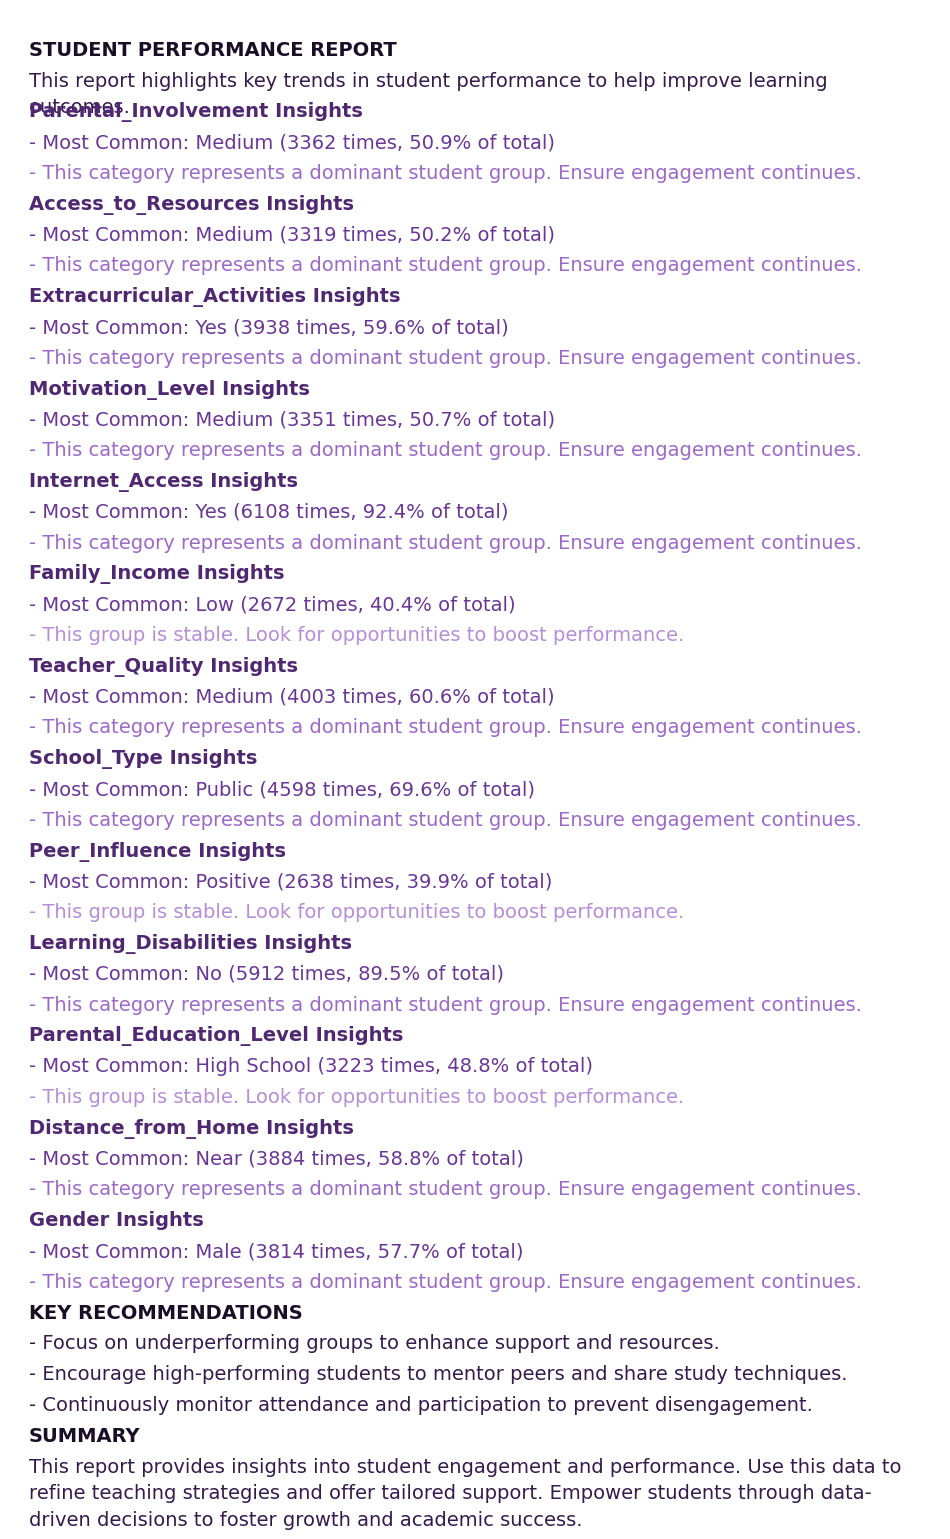

In [79]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Define color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def generate_summary_report_image(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    insights = []

    # Title Section
    insights.append(("STUDENT PERFORMANCE REPORT\n", DARK_COLORS[0], "bold"))
    insights.append(("This report highlights key trends in student performance to help improve learning outcomes.\n\n\n\n", DARK_COLORS[1], "regular"))

    # Generate insights for each categorical column related to student performance
    for column in categorical_columns:
        value_counts = df[column].value_counts()
        top_value = value_counts.idxmax()
        count = value_counts.max()
        total = len(df)
        percentage = (count / total) * 100

        # Define color coding based on percentage
        if percentage > 50:
            color = LIGHT_COLORS[0]  # Most common category
            action = "This category represents a dominant student group. Ensure engagement continues.\n"
        elif percentage > 20:
            color = LIGHT_COLORS[1]  # Moderate category
            action = "This group is stable. Look for opportunities to boost performance.\n"
        else:
            color = LIGHT_COLORS[2]  # Low-performing category
            action = "This category has lower engagement. Develop strategies to support this group.\n"

        # Generate formatted insight
        insights.append((f"{column} Insights", DARK_COLORS[2], "bold"))
        insights.append((f"- Most Common: {top_value} ({count} times, {percentage:.1f}% of total)", DARK_COLORS[3], "regular"))
        insights.append((f"- {action}\n", color, "regular"))

    # Key Recommendations for improving student performance
    insights.append(("KEY RECOMMENDATIONS\n", DARK_COLORS[0], "bold"))
    insights.append(("- Focus on underperforming groups to enhance support and resources.", DARK_COLORS[1], "regular"))
    insights.append(("- Encourage high-performing students to mentor peers and share study techniques.", DARK_COLORS[1], "regular"))
    insights.append(("- Continuously monitor attendance and participation to prevent disengagement.\n", DARK_COLORS[1], "regular"))

    # Summary Section
    insights.append(("SUMMARY\n", DARK_COLORS[0], "bold"))
    insights.append(("This report provides insights into student engagement and performance. Use this data to refine teaching strategies and offer tailored support. Empower students through data-driven decisions to foster growth and academic success.", DARK_COLORS[1], "regular"))

    # Create figure with a white background
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100, facecolor="white")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Display text inside the figure with different colors and font weights
    y_position = 0.95
    for text, color, weight in insights:
        wrapped_text = "\n".join(wrap(text, width=90))
        ax.text(
            0.02, y_position, wrapped_text,
            fontsize=14,
            va="top", ha="left",
            family="Times New Roman",
            fontweight=weight,  # Use bold or regular
            linespacing=1.5,
            color=color
        )
        y_position -= 0.05  # Adjust spacing

    # Show the report image
    plt.show()

# Run the improved report with student performance data (assuming df_student_performance is your dataset)
generate_summary_report_image(df_cleaned)


# **Correlation**

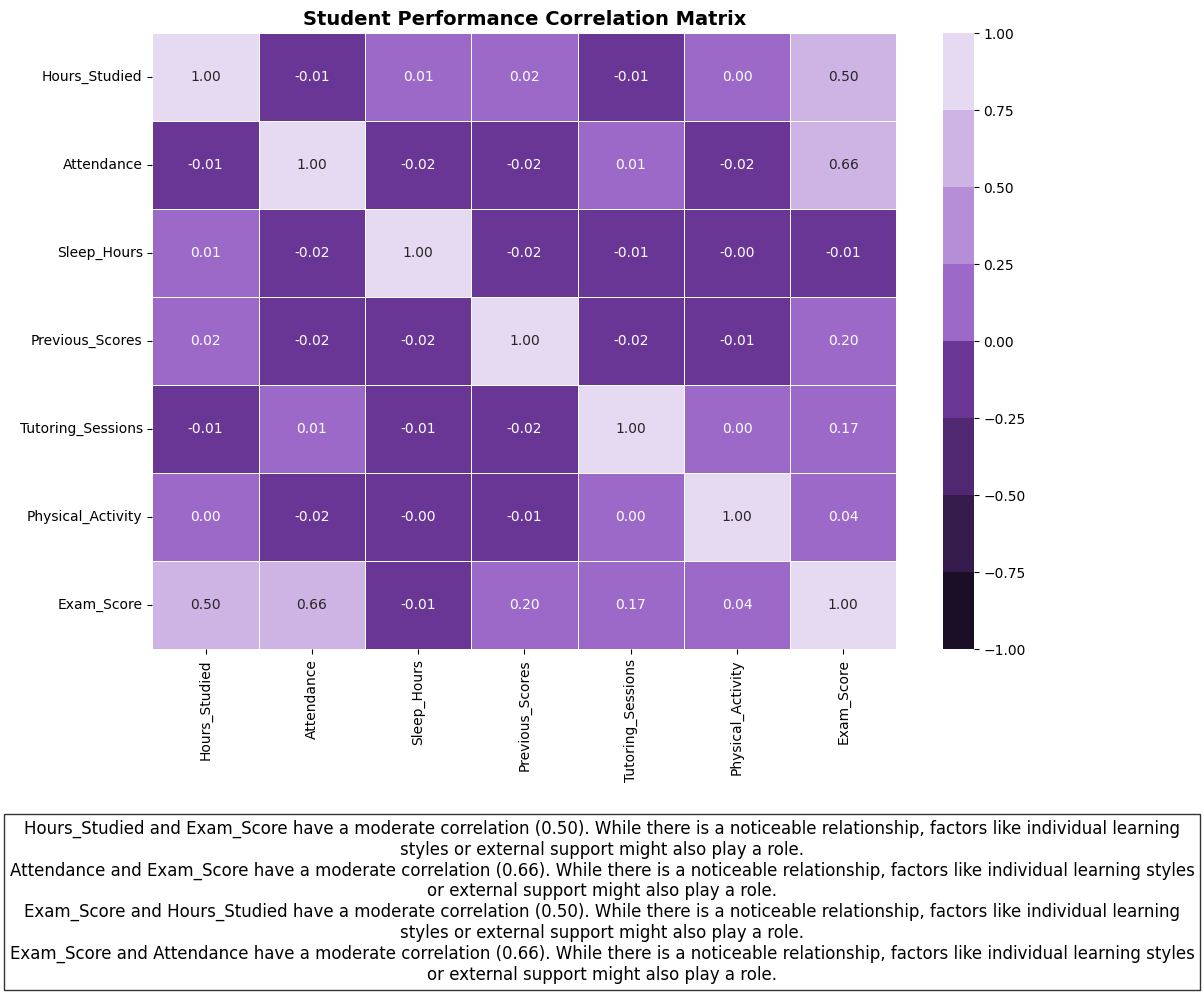

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def plot_correlation_matrix(df):
    """
    Plots a correlation matrix with insights about student performance.
    """
    # Select only numerical columns related to student performance (e.g., grades, attendance, study hours)
    numerical_df = df.select_dtypes(include=[np.number])

    # Compute correlation matrix
    corr_matrix = numerical_df.corr()

    # Define color mapping based on correlation strength
    cmap = sns.color_palette(DARK_COLORS + LIGHT_COLORS, as_cmap=True)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
    plt.title("Student Performance Correlation Matrix", fontsize=14, fontweight='bold')

    # Generate Insights related to student performance
    insights = []
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2:
                corr_value = corr_matrix.loc[col1, col2]
                if corr_value > 0.7:
                    insights.append(f"{col1} and {col2} have a strong positive correlation ({corr_value:.2f}). This suggests that improvements in {col1} are likely to improve {col2}, e.g., better study habits may lead to better grades.")
                elif corr_value < -0.7:
                    insights.append(f"{col1} and {col2} have a strong negative correlation ({corr_value:.2f}). This means that as {col1} increases, {col2} tends to decrease, such as more time spent in social activities could reduce study time.")
                elif 0.3 < corr_value < 0.7 or -0.7 < corr_value < -0.3:
                    insights.append(f"{col1} and {col2} have a moderate correlation ({corr_value:.2f}). While there is a noticeable relationship, factors like individual learning styles or external support might also play a role.")

    # Display Insights Below the Graph
    insight_text = "\n".join(insights)
    plt.figtext(0.5, -0.3, insight_text, wrap=True, horizontalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()


plot_correlation_matrix(df_cleaned)


In [81]:
# Define color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]
OUTLIER_COLOR = "#FF5733"

## **PCA VISUALIZATION**

In [82]:
!pip install scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def plot_pca_clusters(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64'])

    if numerical_cols.shape[1] < 2:
        print("Not enough numerical features for PCA.")
        return

    # Standardize
    X = StandardScaler().fit_transform(numerical_cols)

    # Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)

    # KMeans for clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Custom colors and labels
    DARK_COLORS = ["#1A0D26", "#9C69C9", "#4F2871"]
    cluster_colors = DARK_COLORS[:3]  # Use first three dark colors for clusters

    cluster_labels = {
        0: 'Group A - Possibly High Achievers',
        1: 'Group B - Average Performers',
        2: 'Group C - Students Needing Support'
    }

    # Plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                         c=clusters, cmap=plt.cm.colors.ListedColormap(cluster_colors),
                         edgecolor='k', s=80, alpha=0.8)

    # Create legend
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=cluster_colors[i],
                          markersize=10,
                          label=f'Cluster {i}: {cluster_labels[i]}')
               for i in cluster_labels]

    plt.legend(handles=handles, title="Student Groups", bbox_to_anchor=(1.05, 1), loc='upper left')

    # More understandable axis labels
    plt.xlabel(f"Academic Performance Dimension 1 ({pca.explained_variance_ratio_[0]*100:.1f}% of variability)")
    plt.ylabel(f"Academic Performance Dimension 2 ({pca.explained_variance_ratio_[1]*100:.1f}% of variability)")

    plt.title("Student Performance Analysis: Grouping Similar Students")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

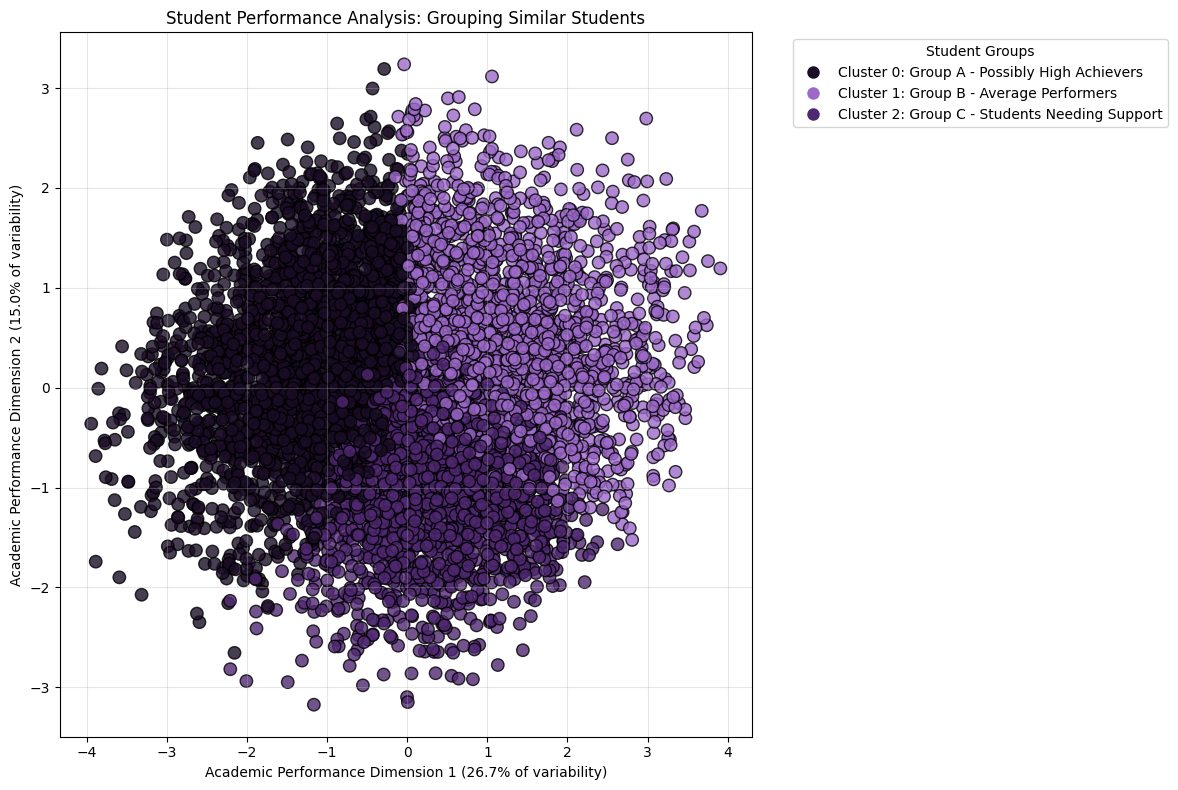

In [83]:
plot_pca_clusters(df_cleaned)